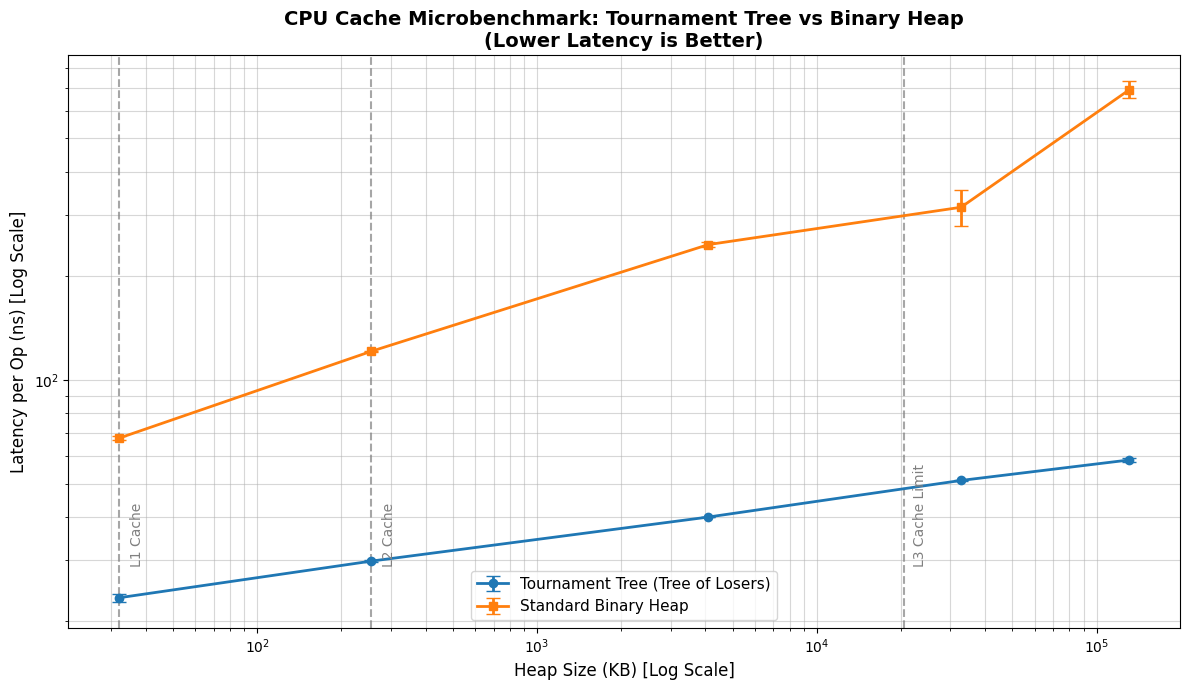

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data from CSV File
# Ensure 'cache_bench_results.csv' exists in the same directory
try:
    df = pd.read_csv('/Users/rikiotaki/workspace/es/logs/rs_cache_bench_results.csv')
except FileNotFoundError:
    print("Error: 'cache_bench_results.csv' not found. Please run the Rust benchmark first.")
    # Create dummy data for demonstration if file is missing
    data = {
        'HeapSize_KB': [32, 32, 256, 256, 4096, 4096, 32768, 32768, 131072, 131072],
        'Algo': ['TournamentTree', 'BinaryHeap', 'TournamentTree', 'BinaryHeap', 
                 'TournamentTree', 'BinaryHeap', 'TournamentTree', 'BinaryHeap', 
                 'TournamentTree', 'BinaryHeap'],
        'Ops_Per_Sec': [43073170, 15006762, 33645640, 8217626, 24761061, 3733795, 
                        19438723, 2268189, 17226682, 1381636],
        'Latency_ns': [23.22, 66.64, 29.72, 121.69, 40.39, 267.82, 51.44, 440.88, 58.05, 723.78],
        'Latency_StdDev_ns': [1.5, 3.2, 2.1, 5.8, 2.5, 12.4, 3.9, 25.6, 4.2, 41.3]
    }
    df = pd.DataFrame(data)
    print("Using dummy data for visualization.")

# 2. Plotting
plt.figure(figsize=(12, 7))

# Filter data by Algorithm
tt_data = df[df['Algo'] == 'TournamentTree']
bh_data = df[df['Algo'] == 'BinaryHeap']

# Plot Lines with Error Bars
# yerr expects the error values (standard deviation)
plt.errorbar(tt_data['HeapSize_KB'], tt_data['Latency_ns'], yerr=tt_data['Latency_StdDev_ns'], 
             marker='o', label='Tournament Tree (Tree of Losers)', capsize=5, 
             linestyle='-', linewidth=2, color='#1f77b4')

plt.errorbar(bh_data['HeapSize_KB'], bh_data['Latency_ns'], yerr=bh_data['Latency_StdDev_ns'], 
             marker='s', label='Standard Binary Heap', capsize=5, 
             linestyle='-', linewidth=2, color='#ff7f0e')

# Formatting
plt.xscale('log')  
plt.yscale('log') 
plt.xlabel('Heap Size (KB) [Log Scale]', fontsize=12)
plt.ylabel('Latency per Op (ns) [Log Scale]', fontsize=12)
plt.title('CPU Cache Microbenchmark: Tournament Tree vs Binary Heap\n(Lower Latency is Better)', fontsize=14, fontweight='bold')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend(fontsize=11)

# Annotations for Cache Sizes (Approximate)
# Standard sizes: L1=32KB, L2=256KB, L3=20MB
plt.axvline(x=32, color='gray', linestyle='--', alpha=0.7)
plt.text(35, plt.ylim()[0]*1.5, 'L1 Cache', rotation=90, fontsize=10, color='gray', va='bottom')

plt.axvline(x=256, color='gray', linestyle='--', alpha=0.7)
plt.text(280, plt.ylim()[0]*1.5, 'L2 Cache', rotation=90, fontsize=10, color='gray', va='bottom')

plt.axvline(x=20480, color='gray', linestyle='--', alpha=0.7) 
plt.text(22000, plt.ylim()[0]*1.5, 'L3 Cache Limit', rotation=90, fontsize=10, color='gray', va='bottom')

plt.tight_layout()
plt.show()